In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("coviddataset.crdownload")

# View the first few rows
print(df.head())

# Check data types
print(df.dtypes)

# Check for missing values
print(df.isnull().sum().sort_values(ascending=False).head(10))

  iso_code continent     location        date  total_cases  new_cases  \
0      AFG      Asia  Afghanistan  2020-01-05            0          0   
1      AFG      Asia  Afghanistan  2020-01-06            0          0   
2      AFG      Asia  Afghanistan  2020-01-07            0          0   
3      AFG      Asia  Afghanistan  2020-01-08            0          0   
4      AFG      Asia  Afghanistan  2020-01-09            0          0   

   new_cases_smoothed  total_deaths  new_deaths  new_deaths_smoothed  ...  \
0                 NaN             0           0                  NaN  ...   
1                 NaN             0           0                  NaN  ...   
2                 NaN             0           0                  NaN  ...   
3                 NaN             0           0                  NaN  ...   
4                 NaN             0           0                  NaN  ...   

   male_smokers  handwashing_facilities  hospital_beds_per_thousand  \
0           NaN            

In [3]:
# Drop rows with missing 'new_cases' or 'total_cases' as an example
df_clean = df.dropna(subset=["new_cases", "total_cases"])


In [4]:
# Basic statistics
print(df_clean.describe())

# Group by country (location) and calculate average new cases
grouped = df_clean.groupby("location")["new_cases"].mean().sort_values(ascending=False)
print(grouped.head(10))

        total_cases      new_cases  new_cases_smoothed   total_deaths  \
count  1.105300e+04   11053.000000        11018.000000   11053.000000   
mean   1.414980e+06    1280.092464         1284.152545   29886.660364   
std    3.670602e+06   13781.241784         5079.730039   75342.673635   
min    0.000000e+00       0.000000            0.000000       0.000000   
25%    8.359000e+03       0.000000            0.143000      85.000000   
50%    9.352400e+04       0.000000           28.642500    1917.000000   
75%    2.718520e+05       0.000000          180.429000    6881.000000   
max    1.314538e+07  316014.000000        45144.857000  259117.000000   

         new_deaths  new_deaths_smoothed  total_cases_per_million  \
count  11053.000000         11018.000000             11053.000000   
mean      25.306704            25.387117             82138.980396   
std      281.981290           104.126719            161825.307654   
min        0.000000             0.000000                 0.000000 

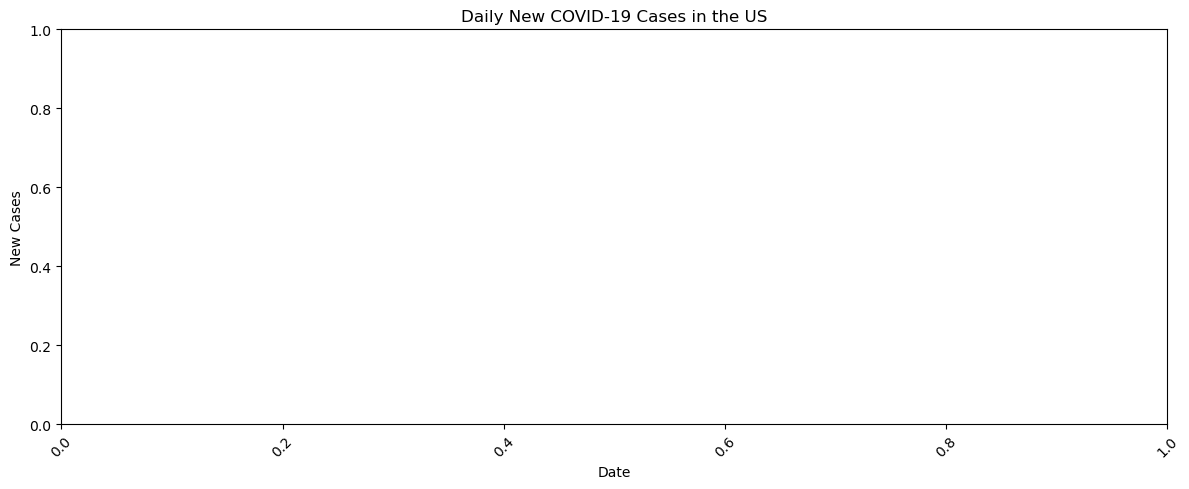

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart: daily new cases for United States
us = df_clean[df_clean["location"] == "United States"]
plt.figure(figsize=(12, 5))
sns.lineplot(x="date", y="new_cases", data=us)
plt.title("Daily New COVID-19 Cases in the US")
plt.xticks(rotation=45)
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.tight_layout()
plt.show()

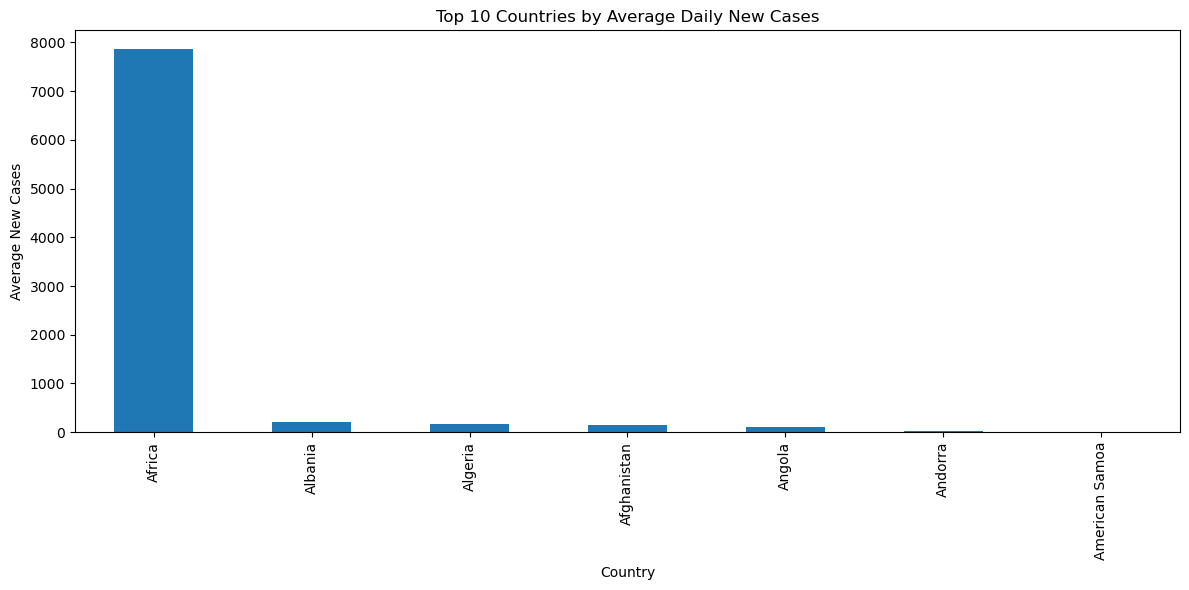

In [6]:
# Bar chart: average new cases per country (top 10)
plt.figure(figsize=(12, 6))
grouped.head(10).plot(kind='bar')
plt.title("Top 10 Countries by Average Daily New Cases")
plt.xlabel("Country")
plt.ylabel("Average New Cases")
plt.tight_layout()
plt.show()

/opt/conda/envs/anaconda-2024.02-py310/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


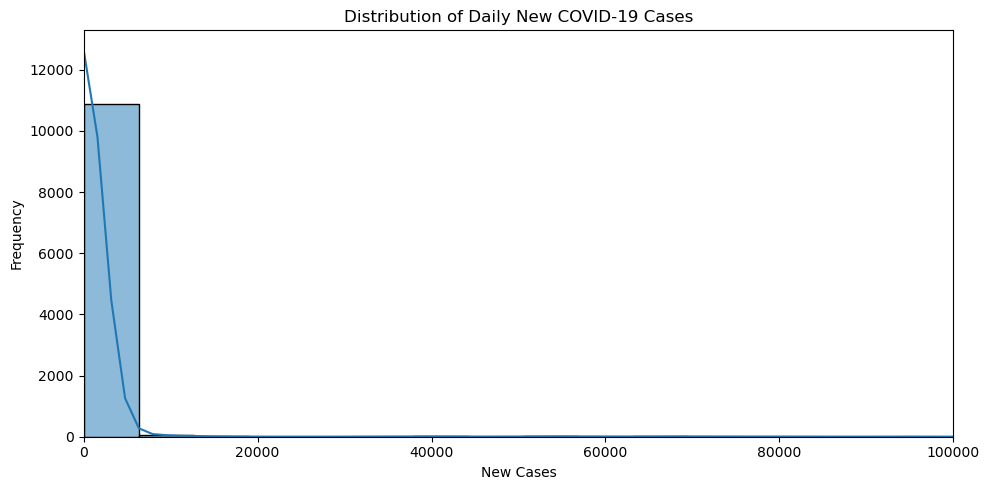

In [7]:
# Histogram: distribution of new cases
plt.figure(figsize=(10, 5))
sns.histplot(df_clean["new_cases"], bins=50, kde=True)
plt.title("Distribution of Daily New COVID-19 Cases")
plt.xlabel("New Cases")
plt.ylabel("Frequency")
plt.xlim(0, 100000)  # limit outliers
plt.tight_layout()
plt.show()

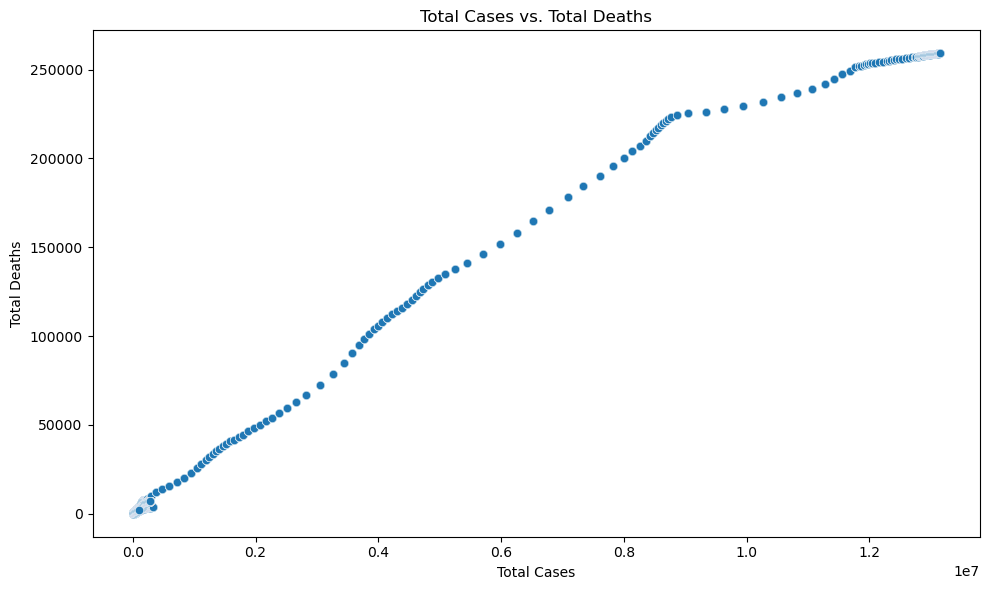

In [8]:
# Scatter plot: total cases vs. total deaths
plt.figure(figsize=(10, 6))
sns.scatterplot(x="total_cases", y="total_deaths", data=df_clean, alpha=0.5)
plt.title("Total Cases vs. Total Deaths")
plt.xlabel("Total Cases")
plt.ylabel("Total Deaths")
plt.tight_layout()
plt.show()